# Problem Statement :

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.


# Objective:

Approach: Gather comprehensive player statistics including batting average, strike rate, bowling economy, wicket-taking ability, and fielding prowess. Perform data cleaning, handle missing values, and preprocess the data. Utilize exploratory data analysis (EDA) techniques to understand player patterns. Apply feature extraction methods, such as PCA (Principal Component Analysis), and employ clustering algorithms like K-means or hierarchical clustering to group players based on their skills and playing attributes.

Outcome: Create meaningful player clusters representing distinct playing styles (e.g., aggressive hitters, spin bowlers) and performance levels. This categorization aids team management in forming balanced squads for specific match formats (T20, One Day Internationals, Test matches), improving team strategy, and selecting players suitable for various game situations, ultimately enhancing team performance and strategic decision-making in cricket.

## Importing Libraries

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importing data

In [244]:
df = pd.read_csv(r"C:\Users\vikas\Coding\ML\Projects\Walmart\Walmart DataSet.csv")

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106


## Data Description

The dataset contains 6435 rows and 8 columns.

Store         -->   Store number
Date          -->   Week of Sales
Weekly_Sales  -->   Sales for the given store in that week
Holiday_Flag  -->   If it is a holiday week
Temperature   -->   Temperature on the day of the sale
Fuel_Price    -->   Cost of the fuel in the region
CPI           -->   Consumer Price Index
Unemployment  -->   Unemployment Rate


# Data Preprocessing

In [245]:
df.shape

(6435, 8)

In [246]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [248]:
# checking if there is any null values are present or not

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [249]:
# Checking for the duplicate values

duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


In [250]:
# Checking if any empty value is present or not


df[df["Unemployment"].isin([' '])].sum()

Store          0.000
Date           0.000
Weekly_Sales   0.000
Holiday_Flag   0.000
Temperature    0.000
Fuel_Price     0.000
CPI            0.000
Unemployment   0.000
dtype: float64

## Outlier Analysis

In [251]:
col_list = list(df.columns)

col_list

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

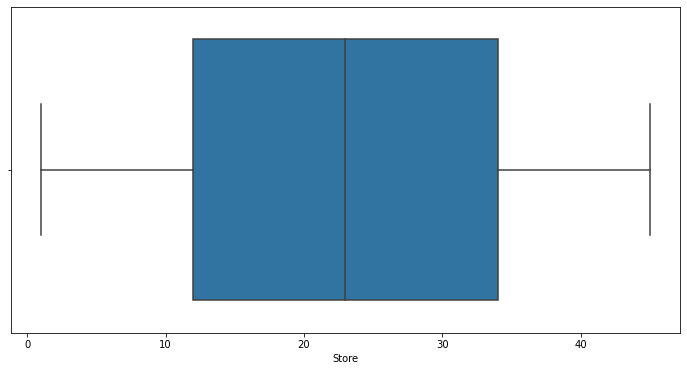

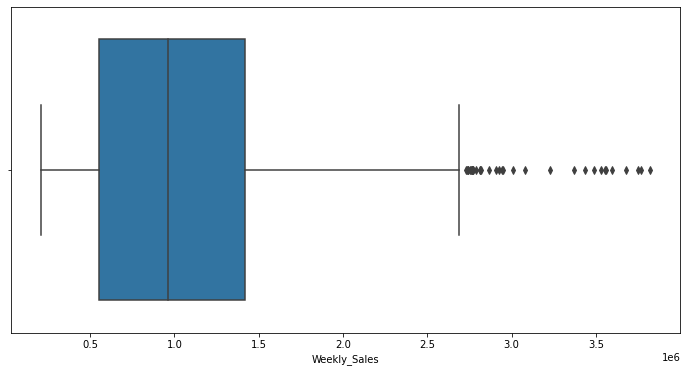

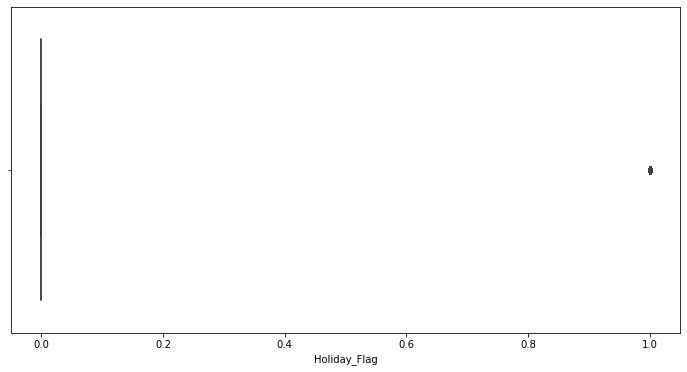

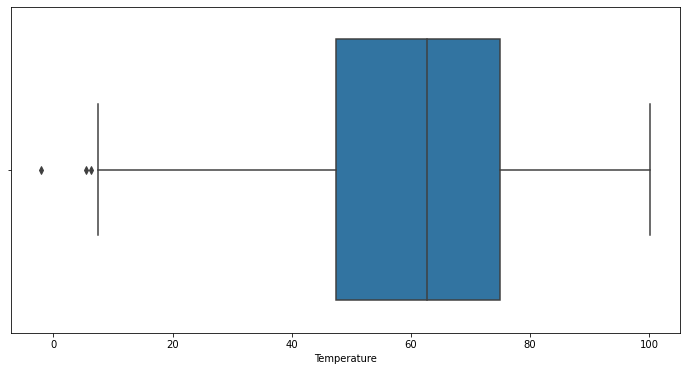

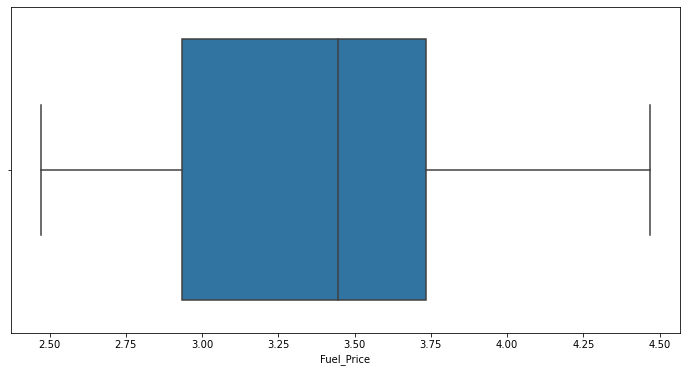

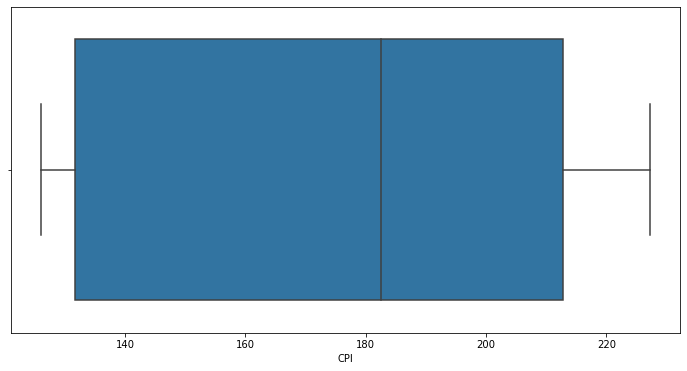

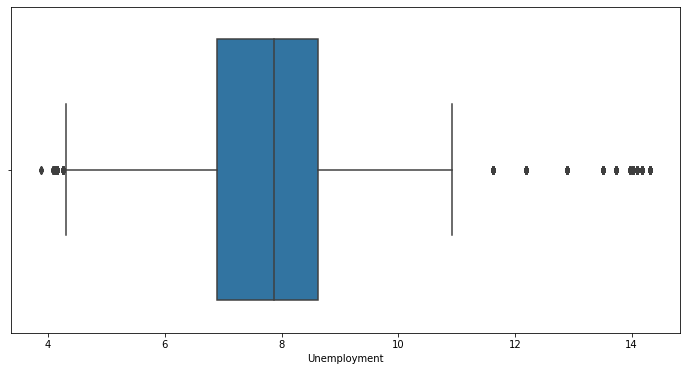

In [252]:
# Making boxplot to check for all columns wether outliers are present or not 



for i in col_list:
    if (df[i].dtypes != "object"):
        plt.figure()
        sns.boxplot(x = df[i])
        

## Removing the Outliers

In [253]:
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR)  # it will show all the IQR for all numrical columns in one go

type(IQR)

Store              22.000
Weekly_Sales   866808.555
Holiday_Flag        0.000
Temperature        27.480
Fuel_Price          0.802
CPI                81.008
Unemployment        1.731
dtype: float64


pandas.core.series.Series

In [254]:
df.shape

(6435, 8)

In [255]:

# Upper Limit = Q3 + 1.5*IQR
# Lower limit = Q1 - 1.5*IQR


df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 

In [256]:
df.shape

# Near 900 rows has been droped as we have removed the outliers

(5508, 8)

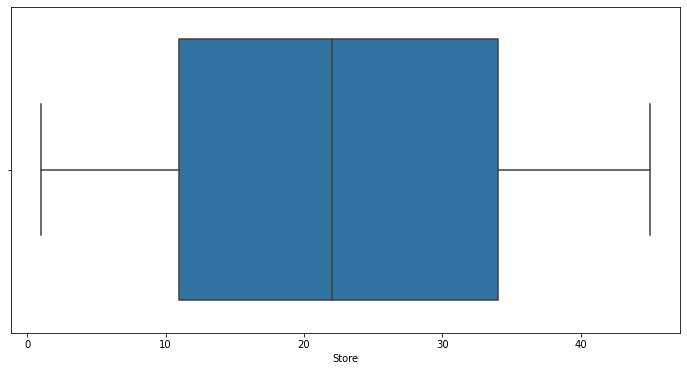

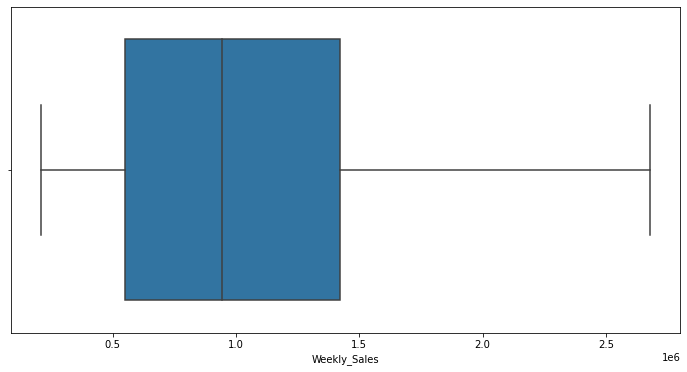

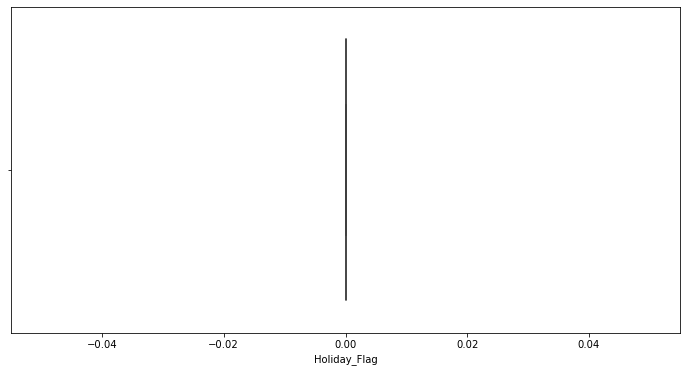

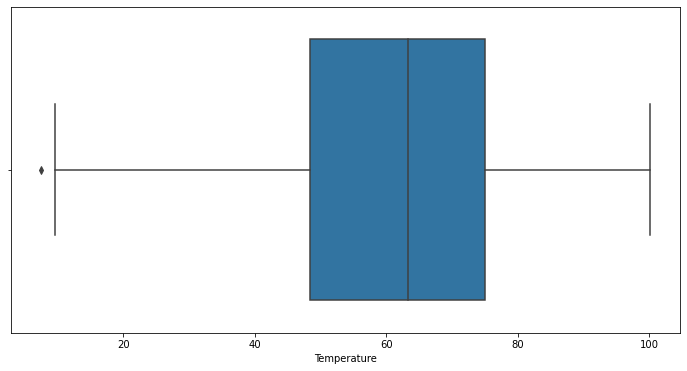

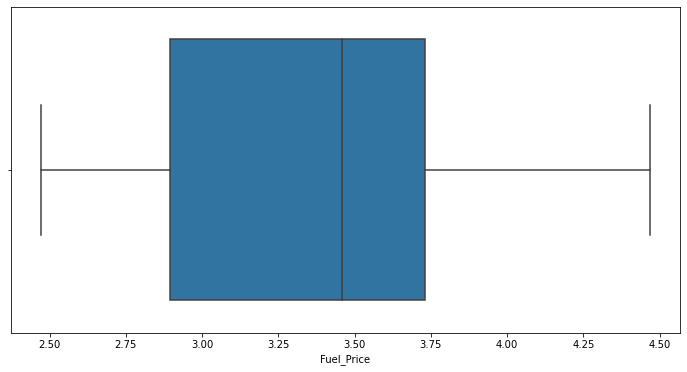

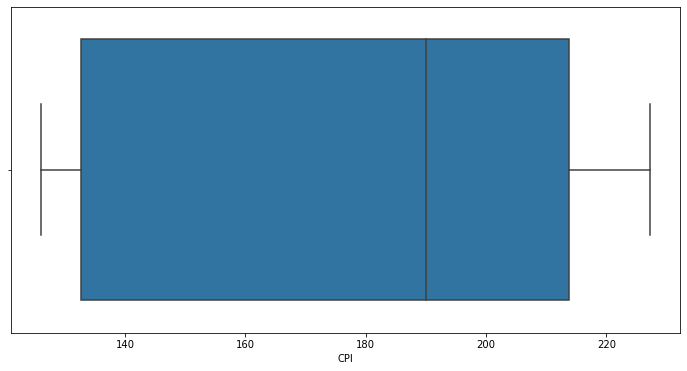

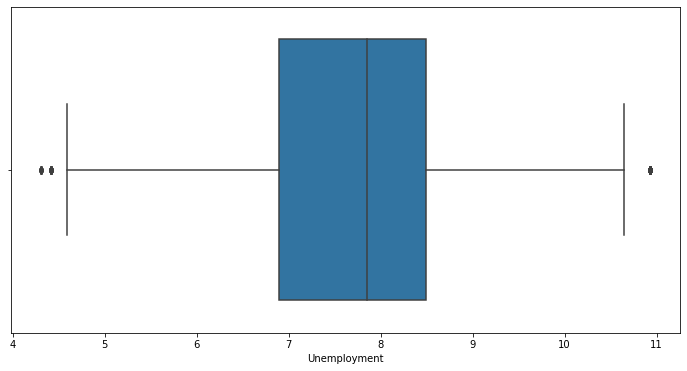

In [257]:
for i in col_list:
     if df[i].dtypes != "object":
        plt.figure()
        sns.boxplot(x=df[i])

In [258]:
# We done Treatment of all outliers

# EDA    (Exploratory Data Analysis)

In [259]:
# Statistical Summary

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5508.000,5508.000,5508.000,5508.000,5508.000,5508.000,5508.000
mean,22.786,1035645.011,0.000,61.221,3.350,175.028,7.719
std,13.093,549276.023,0.000,17.984,0.460,39.036,1.244
min,1.000,209986.250,0.000,7.460,2.472,126.064,4.308
25%,11.000,551128.645,0.000,48.445,2.895,132.762,6.891
50%,22.000,943902.205,0.000,63.350,3.459,189.972,7.852
75%,34.000,1422559.645,0.000,75.095,3.732,213.842,8.494
max,45.000,2678206.420,0.000,100.140,4.468,227.233,10.926


In [260]:
df["Holiday_Flag"].unique()

array([0], dtype=int64)

In [261]:
df.drop(columns=['Holiday_Flag'], inplace=True)

### Correlation of dependent variable with the independent variables

In [262]:
df.corr()['Weekly_Sales'].sort_values()

Store          -0.320
CPI            -0.084
Unemployment   -0.074
Temperature    -0.039
Fuel_Price      0.020
Weekly_Sales    1.000
Name: Weekly_Sales, dtype: float64

In [263]:
df.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000,-0.320,-0.028,0.047,-0.207,0.311
Weekly_Sales,-0.320,1.000,-0.039,0.020,-0.084,-0.074
Temperature,-0.028,-0.039,1.000,0.123,0.221,0.026
Fuel_Price,0.047,0.020,0.123,1.000,-0.142,-0.105
CPI,-0.207,-0.084,0.221,-0.142,1.000,-0.221
Unemployment,0.311,-0.074,0.026,-0.105,-0.221,1.000


### HeatMap

We use heatmap to graphically represent correlation matrix and understand the strength of linear relationship among the variables.

In [264]:
df.corr()['Weekly_Sales'].sort_values()

Store          -0.320
CPI            -0.084
Unemployment   -0.074
Temperature    -0.039
Fuel_Price      0.020
Weekly_Sales    1.000
Name: Weekly_Sales, dtype: float64

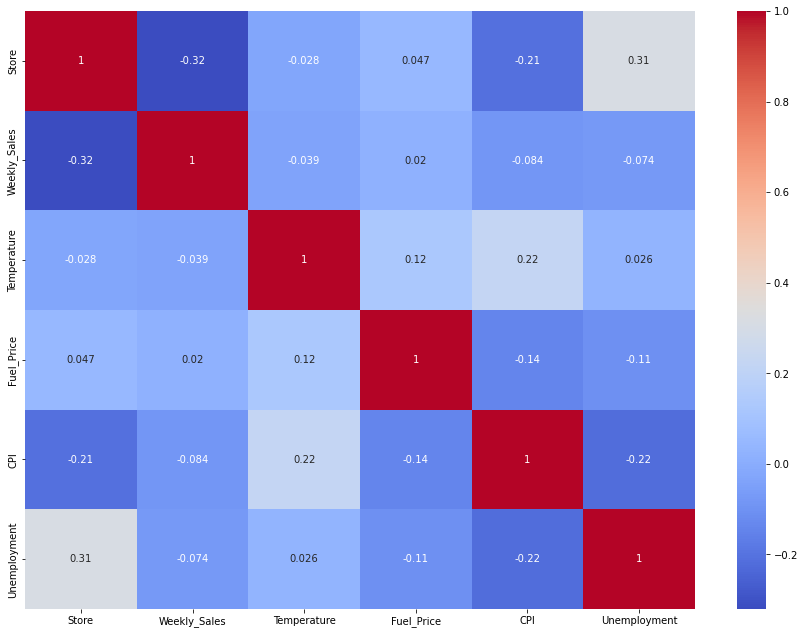

In [265]:
# Making Heatmap

plt.figure(figsize = (15,11))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

#### If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [266]:
# Calculating Overall correlation between Weekly_Sales and Unemployment:

correlation = df['Weekly_Sales'].corr(df['Unemployment'])

print("Correlation between Weekly Sales and Unemployment Rate:", correlation)

# Interpretation:

if correlation > 0:
    print("There is a positive correlation: as unemployment rate increases, weekly sales also increase.")
elif correlation < 0:
    print("There is a negative correlation: as unemployment rate increases, weekly sales tend to decrease.")
else:
    print("There is no significant correlation between weekly sales and unemployment rate.")


Correlation between Weekly Sales and Unemployment Rate: -0.07378811624330109
There is a negative correlation: as unemployment rate increases, weekly sales tend to decrease.


In [267]:
# Calculating correlation between Weekly_Sales and Unemployment for each store:

store_correlations = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment'])).reset_index()
store_correlations.columns = ['Store', 'Correlation']


print("Correlation between Weekly Sales and Unemployment Rate for each store:")
print(store_correlations)



Correlation between Weekly Sales and Unemployment Rate for each store:
    Store  Correlation
0       1       -0.119
1       2        0.041
2       3       -0.275
3       4       -0.659
4       5       -0.287
5       6        0.013
6       7       -0.212
7       8       -0.067
8       9       -0.219
9      10        0.192
10     11       -0.030
11     12        0.022
12     13       -0.384
13     14        0.342
14     15        0.091
15     16       -0.074
16     17       -0.300
17     18        0.161
18     19        0.112
19     20       -0.091
20     21        0.230
21     22        0.053
22     23       -0.239
23     24       -0.008
24     25        0.031
25     26       -0.061
26     27        0.008
27     28       -0.147
28     29        0.092
29     30        0.209
30     31       -0.094
31     32       -0.124
32     33        0.111
33     34       -0.000
34     35        0.559
35     36        0.840
36     37       -0.223
37     38       -0.179
38     39       -0.428
39     40

In [268]:
dfcorr = pd.DataFrame(store_correlations).reset_index()


In [269]:
dfcorr = dfcorr[["Store", "Correlation"]]


In [270]:
dfcorr.head()


,Store,Correlation
0,1,-0.119
1,2,0.041
2,3,-0.275
3,4,-0.659
4,5,-0.287


### Top 10 stores are suffering the most:

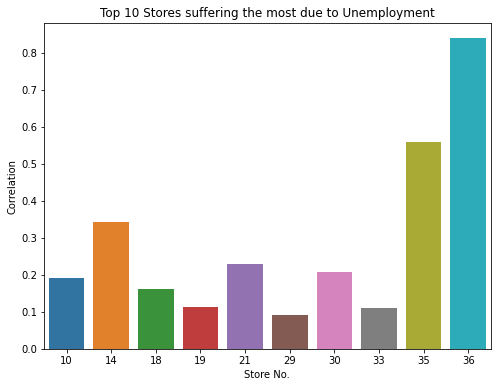

In [271]:

# Sort the DataFrame by 'Correlation' column in descending order and select the top 10 rows
sorted_df = dfcorr.sort_values(by='Correlation', ascending=False)[:10]

# Set x as 'Correlation' and y as 'Store'
y = sorted_df["Correlation"]
x = sorted_df["Store"]

plt.figure(figsize=(8, 6))
plt.title("Top 10 Stores suffering the most due to Unemployment")
sns.barplot(x=x, y=y)
plt.ylabel("Correlation")
plt.xlabel("Store No.")
plt.show()


#### Does temperature affect the weekly sales in any manner?

In [272]:
# Calculating Overall correlation between Weekly_Sales and Temperature:
temperature_correlation = df['Weekly_Sales'].corr(df['Temperature'])

print("Correlation between Weekly Sales and Temperature:", temperature_correlation)

# Interpretation:

if temperature_correlation > 0:
    print("There is a positive correlation: as temperature increases, weekly sales also increase.")
elif temperature_correlation < 0:
    print("There is a negative correlation: as temperature increases, weekly sales tend to decrease.")
else:
    print("There is no significant correlation between weekly sales and temperature.")


Correlation between Weekly Sales and Temperature: -0.03892785665477307
There is a negative correlation: as temperature increases, weekly sales tend to decrease.


In [273]:
# Calculating Overall correlation between Weekly_Sales and Consumer_Price_Index:
cpi_correlation = df['Weekly_Sales'].corr(df['CPI'])

print("Correlation between Weekly Sales and Consumer Price Index (CPI):", cpi_correlation)

# Interpretation:

if cpi_correlation > 0:
    print("There is a positive correlation: as CPI increases, weekly sales also increase.")
elif cpi_correlation < 0:
    print("There is a negative correlation: as CPI increases, weekly sales tend to decrease.")
else:
    print("There is no significant correlation between weekly sales and Consumer Price Index (CPI).")


Correlation between Weekly Sales and Consumer Price Index (CPI): -0.08420997419063511
There is a negative correlation: as CPI increases, weekly sales tend to decrease.


### Top performing stores according to the historical data.


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5508 non-null   int64  
 1   Date          5508 non-null   object 
 2   Weekly_Sales  5508 non-null   float64
 3   Temperature   5508 non-null   float64
 4   Fuel_Price    5508 non-null   float64
 5   CPI           5508 non-null   float64
 6   Unemployment  5508 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 344.2+ KB


In [275]:
df["Date"]= pd.to_datetime(df["Date"])
  

In [276]:
# Extracting the year from the "Date" column and creating a new column called "Year"
df['Year'] = df['Date'].dt.year

# Calculating the sum of "Weekly_Sales" for each store and year
top_yearly = pd.DataFrame(df.groupby(["Store", "Year"])["Weekly_Sales"].sum())

# Reseting the index to make "Store" and "Year" columns in the DataFrame
top_yearly.reset_index(inplace=True)

# Sorting the DataFrame in descending order based on "Weekly_Sales" column within each year
top_1_stores_yearly = top_yearly.sort_values(by=["Year", "Weekly_Sales"], ascending=[True, False]).groupby("Year").head(1)

print(top_1_stores_yearly)


    Store  Year  Weekly_Sales
37     14  2010  90439281.750
10      4  2011  95351712.690
57     20  2012  85284202.040


In [277]:
# Extracting the year from the "Date" column and creating a new column called "Year"
df['Year'] = df['Date'].dt.year

# Calculating the sum of "Weekly_Sales" for each store and year
top_yearly = pd.DataFrame(df.groupby(["Store", "Year"])["Weekly_Sales"].sum())

# Reseting the index to make "Store" and "Year" columns in the DataFrame
top_yearly.reset_index(inplace=True)

# Sorting the DataFrame in descending order based on "Weekly_Sales" column within each year
top_5_stores_yearly = top_yearly.sort_values(by=["Year", "Weekly_Sales"], ascending=[True, False]).groupby("Year").head(5)

print(top_5_stores_yearly)


    Store  Year  Weekly_Sales
37     14  2010  90439281.750
55     20  2010  83659643.520
3       2  2010  83455758.340
9       4  2010  80775233.890
34     13  2010  80660415.990
10      4  2011  95351712.690
56     20  2011  94307405.730
38     14  2011  93944553.080
35     13  2011  89569812.860
4       2  2011  86979040.540
57     20  2012  85284202.040
36     13  2012  82472374.140
5       2  2012  77494595.620
29     10  2012  74301737.860
39     14  2012  73459629.680


### The worst performing store, and how significant is the difference between the highest and lowest performing stores

In [278]:
# Worst 1 performing Store year wise:

# Extracting the year from the "Date" column and creating a new column called "Year"
df['Year'] = df['Date'].dt.year

# Calculating the sum of "Weekly_Sales" for each store and year
worst_yearly = pd.DataFrame(df.groupby(["Store", "Year"])["Weekly_Sales"].sum())

# Reseting the index to make "Store" and "Year" columns in the DataFrame
worst_yearly.reset_index(inplace=True)

# Sorting the DataFrame in ascending order based on "Weekly_Sales" column within each year
worst_1_stores_yearly = worst_yearly.sort_values(by=["Year", "Weekly_Sales"], ascending=[True, True]).groupby("Year").head(1)

print(worst_1_stores_yearly)



     Store  Year  Weekly_Sales
91      33  2010  11739267.130
92      33  2011  11928439.970
106     38  2012   6857104.070


In [279]:
# Worst 5 performing Store year wise:

# Extracting the year from the "Date" column and creating a new column called "Year"
df['Year'] = df['Date'].dt.year

# Calculating the sum of "Weekly_Sales" for each store and year
worst_yearly = pd.DataFrame(df.groupby(["Store", "Year"])["Weekly_Sales"].sum())

# Reseting the index to make "Store" and "Year" columns in the DataFrame
worst_yearly.reset_index(inplace=True)

# Sorting the DataFrame in ascending order based on "Weekly_Sales" column within each year
worst_5_stores_yearly = worst_yearly.sort_values(by=["Year", "Weekly_Sales"], ascending=[True, True]).groupby("Year").head(5)

print(worst_5_stores_yearly)



     Store  Year  Weekly_Sales
91      33  2010  11739267.130
121     44  2010  12487623.580
12       5  2010  13431129.200
6        3  2010  17024183.470
100     36  2010  19480888.470
92      33  2011  11928439.970
122     44  2011  14321849.830
13       5  2011  14980594.290
101     36  2011  17597920.140
7        3  2011  19041523.800
106     38  2012   6857104.070
93      33  2012  10866569.670
102     36  2012  12657000.060
14       5  2012  13468949.340
123     44  2012  13523258.420


#### Difference between the highest and lowest performing stores

In [280]:
# Finding the highest and lowest total sales

highest_sales = top['Weekly_Sales'].max()
lowest_sales = top['Weekly_Sales'].min()

# Calculating the difference
difference = highest_sales - lowest_sales

print("Difference between highest and lowest performing stores:", difference)


Difference between highest and lowest performing stores: 88494608.62


In [281]:
top = pd.DataFrame(df.groupby(["Store", "Year"])["Weekly_Sales"].sum())

# Grouping by 'Year' and finding the highest and lowest sales for each year
yearly_highest_sales = top.groupby('Year')['Weekly_Sales'].max()
yearly_lowest_sales = top.groupby('Year')['Weekly_Sales'].min()

# Calculating the difference in sales between highest and lowest performing stores for each year
difference_by_year = yearly_highest_sales - yearly_lowest_sales

print("Difference in sales between highest and lowest performing stores yearly:")
print(difference_by_year)


Difference in sales between highest and lowest performing stores yearly:
Year
2010   78700014.620
2011   83423272.720
2012   78427097.970
Name: Weekly_Sales, dtype: float64


## Checking for Seasonal Trend For Weekly_Sales

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5508 non-null   int64         
 1   Date          5508 non-null   datetime64[ns]
 2   Weekly_Sales  5508 non-null   float64       
 3   Temperature   5508 non-null   float64       
 4   Fuel_Price    5508 non-null   float64       
 5   CPI           5508 non-null   float64       
 6   Unemployment  5508 non-null   float64       
 7   Year          5508 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 387.3 KB


In [283]:
sales = pd.DataFrame(df.groupby("Date")["Weekly_Sales"].sum())

sales.head()

,Weekly_Sales
Date,
2010-01-10,39825602.620
2010-02-04,47601520.010
2010-02-07,46204385.560
2010-02-19,45363033.790
2010-02-26,41043557.900


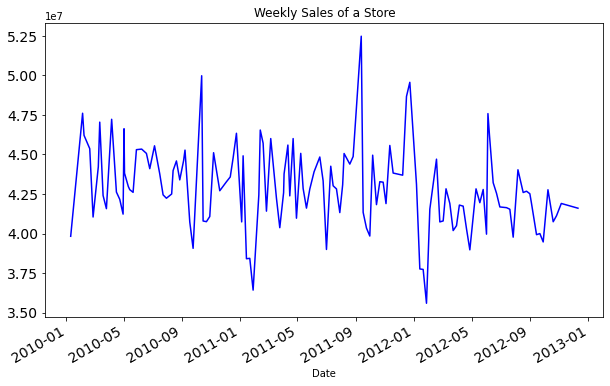

In [284]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

In [285]:
# Here by observations we can say that seasonality is present in the data

# Which means Mean & Variance is not Constant and if they are not constant then it is non Stationary time series

In [286]:
# But I will cross-verify it using Augmented Dickey-Fuller test

In [287]:
from statsmodels.tsa.stattools import adfuller

In [288]:
# ADF Test - nul hypothesis --> non-stationary - if p-value < 5% reject null hypothesis

adfuller_result = adfuller(df.Weekly_Sales, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.986225560257576
p-value: 2.362922600486807e-05
Critial Values:
   1%, -3.431545171565044
Critial Values:
   5%, -2.8620681466589053
Critial Values:
   10%, -2.5670511313761577


In [289]:
# here we got p-value as 2.3% which means we have to reject the null hypothesis
# Therefore, it is non-stationary time series

In [290]:
# Before making any model we need stationary time series, so we need to convert the non-stationary time series into
# stationary time series

In [291]:
# Method 1- Differencing and Seasonal differencing

In [292]:
#Differencing meaning y(t) = y(t)-y(t-1)

In [293]:
df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year
0,1,2010-05-02,1643690.900,42.310,2.572,211.096,8.106,2010
2,1,2010-02-19,1611968.170,39.930,2.514,211.289,8.106,2010
3,1,2010-02-26,1409727.590,46.630,2.561,211.320,8.106,2010
4,1,2010-05-03,1554806.680,46.500,2.625,211.350,8.106,2010
5,1,2010-12-03,1439541.590,57.790,2.667,211.381,8.106,2010
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.950,64.880,3.997,192.014,8.684,2012
6431,45,2012-05-10,733455.070,64.890,3.985,192.170,8.667,2012
6432,45,2012-12-10,734464.360,54.470,4.000,192.327,8.667,2012
6433,45,2012-10-19,718125.530,56.470,3.969,192.331,8.667,2012


In [294]:
df['Weekly_Sales'] = df['Weekly_Sales']- df['Weekly_Sales'].shift(1)

<AxesSubplot:>

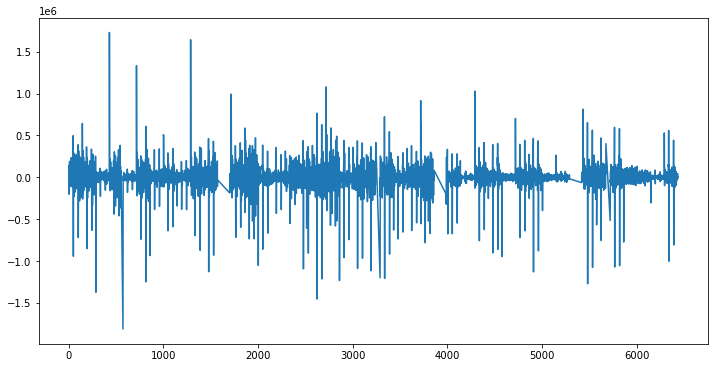

In [295]:
df['Weekly_Sales'].dropna().plot()

In [296]:
# Sesonal differencing meaning - y(t) = y(t)-y(t-n)

<AxesSubplot:>

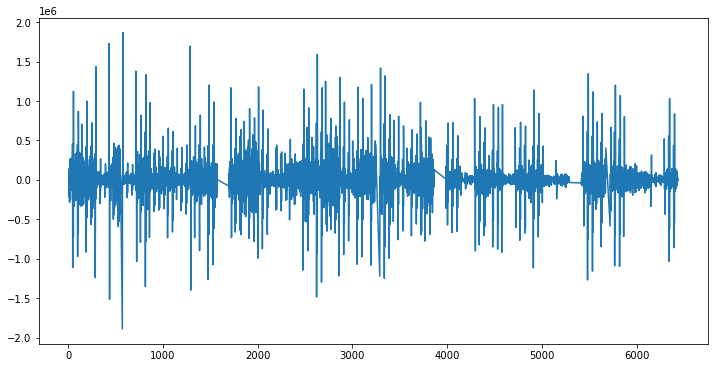

In [297]:

df['Weekly_Sales'] = df['Weekly_Sales'] - df['Weekly_Sales'].shift(7)
df['Weekly_Sales'].dropna().plot()

In [298]:
# Method 2 - Transformation

<AxesSubplot:>

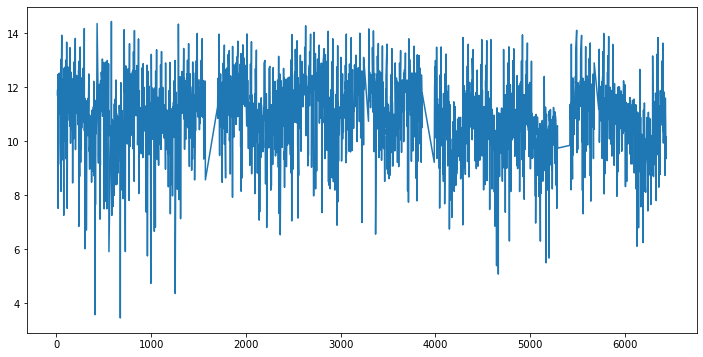

In [299]:
# Create transformation columns
import numpy as np

# Calculate the log 
df['adj_log'] = np.log(df['Weekly_Sales'])

# Calculate the square root 
df['adj_sqrt'] = np.sqrt(df['Weekly_Sales'])

# Calculate the cubed root 
df['adj_cbrt'] = np.cbrt(df['Weekly_Sales'])

df['adj_log'].dropna().plot()

<AxesSubplot:>

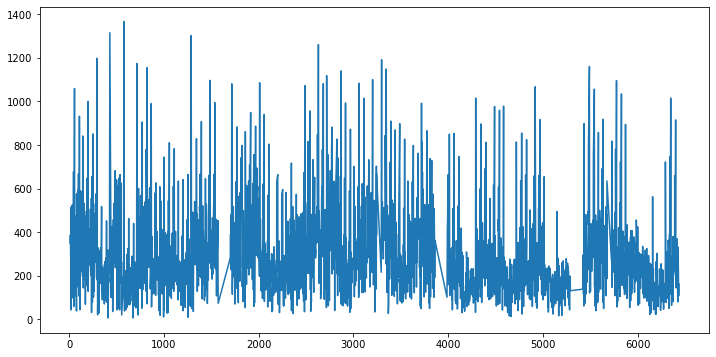

In [300]:
df['adj_sqrt'].dropna().plot()

In [301]:
trainingdata['#Passengers_log_diff'] = trainingdata['adj_log'] - trainingdata['adj_log'].shift(1)
trainingdata['#Passengers_log_diff'].dropna().plot()

NameError: name 'trainingdata' is not defined

<AxesSubplot:>

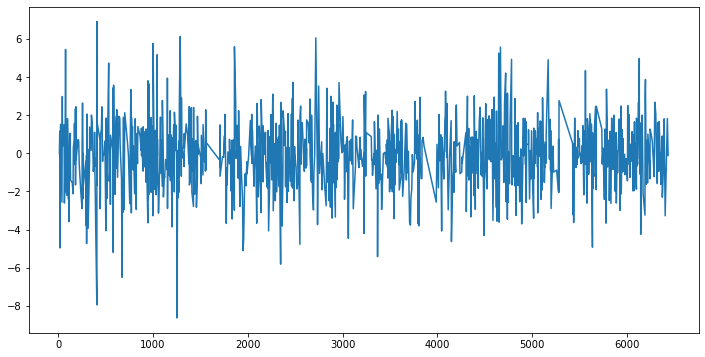

In [302]:

df['Weekly_Sales'] = df['adj_log'] - df['adj_log'].shift(1)
df['Weekly_Sales'].dropna().plot()

In [303]:
# Method 3- Rolling statistics

In [304]:
df['#MA20'] = df['Weekly_Sales'].rolling(window = 3).mean()




<AxesSubplot:>

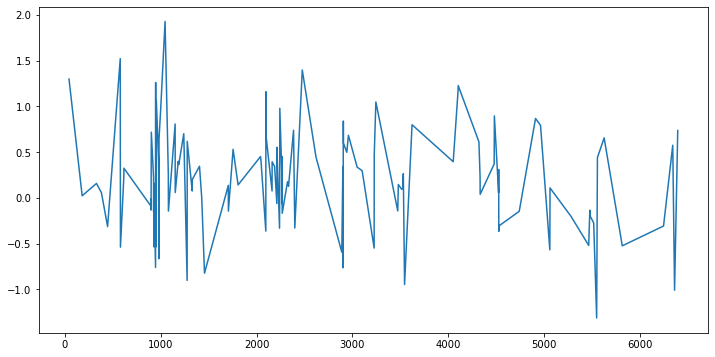

In [305]:
df['#MA20'].dropna().plot()

### Walmart Project Problem faced:

**1. For Holiday_Flag Column**, there was only 2 values (0&1) and while treating the outliers, 1 got deleted as it has considered 1 as outlier